In [1]:
!pip install phylovega --user

In [2]:
!pip install biopython==1.77 --user

In [3]:
!pip install jupyter-require --user

In [4]:
!pip install dendropy

In [1]:
import pandas as pd
import dendropy
import numpy as np

In [2]:
import Bio
import phylopandas as ph
import phylovega
import IPython
import os

In [3]:
path = "../../Data/"
combined_df = pd.DataFrame()
for file in os.listdir(path):
    if '.tre' in file:
        tr1 = ph.read_newick(path+file)
    else:
        continue
    print(file)
    tr1.loc[tr1.type == 'leaf', 'long_id'] = tr1.loc[tr1.type == 'leaf', 'id']
    for parent1 in reversed(range(0, tr1[1:].parent.apply(int).max()+1)):
        parent = str(parent1)
        if parent:
            parentid = "|".join(tr1[tr1.parent == parent].long_id.sort_values())
            tr1.loc[tr1.parent == parent, 'parent_long_id'] = parentid
            tr1.loc[tr1.id == parent, 'long_id'] = parentid
    tr1.loc[tr1.type == 'leaf', 'id'] = tr1.loc[tr1.type == 'leaf', 'id']
    tr1['source'] = file
    print(tr1.head())
    if len(combined_df) > 1:
        combined_df = pd.concat([combined_df, tr1])
    else:
        combined_df = tr1
    print("-------------------------")
combined_df.head()

nextstrain_community_leke-lyu_ncov_texas-all_timetree.tre
   type               id parent    length            label  distance  \
0  root                0   None  0.000000                0  0.000000   
1  node                1      0  0.000000                1  0.000000   
2  leaf  Wuhan/Hu-1/2019      1  0.032305  Wuhan/Hu-1/2019  0.032305   
3  node                2      1  0.012535                2  0.012535   
4  leaf  Wuhan/WH01/2019      2  0.019770  Wuhan/WH01/2019  0.032305   

          uid                                            long_id  \
0  AKIQv3TUPI  Algeria/49926/2021|Australia/NSW-SAVID-4809/20...   
1  1MEqegkIp1  Algeria/49926/2021|Australia/NSW-SAVID-4809/20...   
2  xEiudVM9cn                                    Wuhan/Hu-1/2019   
3  AHBHytgOAb  Algeria/49926/2021|Australia/NSW-SAVID-4809/20...   
4  trMoFzbCuS                                    Wuhan/WH01/2019   

                                      parent_long_id  \
0                                           

,type,id,parent,length,label,distance,uid,long_id,parent_long_id,source
0,root,0,None,0.000000,0,0.000000,AKIQv3TUPI,Algeria/49926/2021|Australia/NSW-SAVID-4809/20...,NaN,nextstrain_community_leke-lyu_ncov_texas-all_t...
1,node,1,0,0.000000,1,0.000000,1MEqegkIp1,Algeria/49926/2021|Australia/NSW-SAVID-4809/20...,Algeria/49926/2021|Australia/NSW-SAVID-4809/20...,nextstrain_community_leke-lyu_ncov_texas-all_t...
2,leaf,Wuhan/Hu-1/2019,1,0.032305,Wuhan/Hu-1/2019,0.032305,xEiudVM9cn,Wuhan/Hu-1/2019,Algeria/49926/2021|Australia/NSW-SAVID-4809/20...,nextstrain_community_leke-lyu_ncov_texas-all_t...
3,node,2,1,0.012535,2,0.012535,AHBHytgOAb,Algeria/49926/2021|Australia/NSW-SAVID-4809/20...,Algeria/49926/2021|Australia/NSW-SAVID-4809/20...,nextstrain_community_leke-lyu_ncov_texas-all_t...
4,leaf,Wuhan/WH01/2019,2,0.019770,Wuhan/WH01/2019,0.032305,trMoFzbCuS,Wuhan/WH01/2019,Algeria/49926/2021|Australia/NSW-SAVID-4809/20...,nextstrain_community_leke-lyu_ncov_texas-all_t...


<AxesSubplot:>

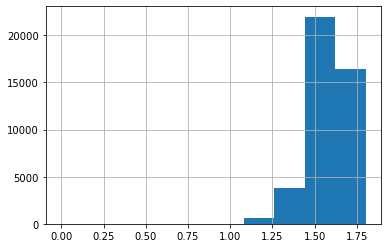

In [4]:
combined_df.distance.hist()

In [5]:
combined_df.to_csv('neo_ready.csv', index=False)